# Problem 1.7

## Problem:

A sample of heads and tails is created by tossing a coin a number of times independently. Assume we have a number of coins that generate different samples independently. For a given coin, let the probability of heads (probability of error) be$\mu$. The probability of obtaining$k$heads in$N$tosses of this coin is given by the binomial distribution:

$$P[k | N, \mu] = {N \choose K} \mu^k (1 - \mu)^{N-k}$$

Remember that the training error$v$is$\frac{k}{N}$.

(a) Assume the sample size ($N$) is 10. If all the coins have$\mu$= 0.05 compute the probability that at least one coin will have$v$= 0 for the case of 1 coin, 1,000 coins, 1,000,000 coins. Repeat for$\mu$= 0.8.

(b) For the case$N$= 6 and 2 coins with$\mu$= 0.5 for both coins, plot the probability

$$P[max |v_i - \mu_i > \epsilon]$$

for$\epsilon$in the range$[0,1]$(the max is over coins). On the same plot show the bound that would be obtained using the Hoeffding Inequality . Remember that for a single coin, the Hoeffding bound is

$$P[|v - \mu| > \epsilon] \leq 2e^{-2\epsilon^2N}$$

[Hint: Use$P[A or B] = P[A] + P[B] - P[A and B] = P[A] + P[B] - P[A]P[B]$, where the last equality follows by independence, to evaluate$P[max...]$]

## Solution

### Problem 1.7 Part (a)

$\sigma = 0.05$: Probability that at least one coin will have$v$= 0 for 
 - 1 coin:
 
  $P[0 | N, \sigma] = {N \choose 0} \sigma^0(1-\sigma)^{N-0}$
   
  $P[0 | 10, 0.05] = {10 \choose 0} 0.05^0(1-0.05)^{10-0} = 0.5987$

 - 1,000 coins:

  $P_{At\ least\ one} = 1 - (P[0 | N, \sigma])^{Number\ of\ Coins}$

  $P_{At\ least\ one} = 1 - ({1000 \choose 0} 0.05^0(1-0.05)^{1000-0})^{1000} = 1$

 - 1,000,000 coins:

  $P_{At\ least\ one} = 1 - (P[0 | N, \sigma])^{Number\ of\ Coins}$

  $P_{At\ least\ one} = 1 - ({1000000 \choose 0} 0.05^0(1-0.05)^{1000000-0})^{1000000} = 1$


$\sigma = 0.8$: Probability that at least one coin will have$v$= 0 for
 - 1 coin:

  $P[0 | N, \sigma] = {N \choose 0} \sigma^0(1-\sigma)^{N-0}$
    
  $P[0 | 10, 0.8] = {10 \choose 0} 0.8^0(1-0.8)^{10-0} = 1.024 \times 10^{-7}$

 - 1,000 coins:

  $P_{At\ least\ one} = 1 - (P[0 | N, \sigma])^{Number\ of\ Coins}$

  $P_{At\ least\ one} = 1 - ({1000 \choose 0} 0.8^0(1-0.8)^{1000-0})^{1000} = 0.000102$

 - 1,000,000 coins:

  $P_{At\ least\ one} = 1 - (P[0 | N, \sigma])^{Number\ of\ Coins}$

  $P_{At\ least\ one} = 1 - ({1000000 \choose 0} 0.8^0(1-0.8)^{1000000-0})^{1000000} = 0.097$


### Problem 1.7 Part (b)

Matplotlib created a temporary config/cache directory at /var/folders/mm/v50bx67d10ldk0sl44smt2q00000gn/T/matplotlib-bklk6air because the default path (/Users/jameshe/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


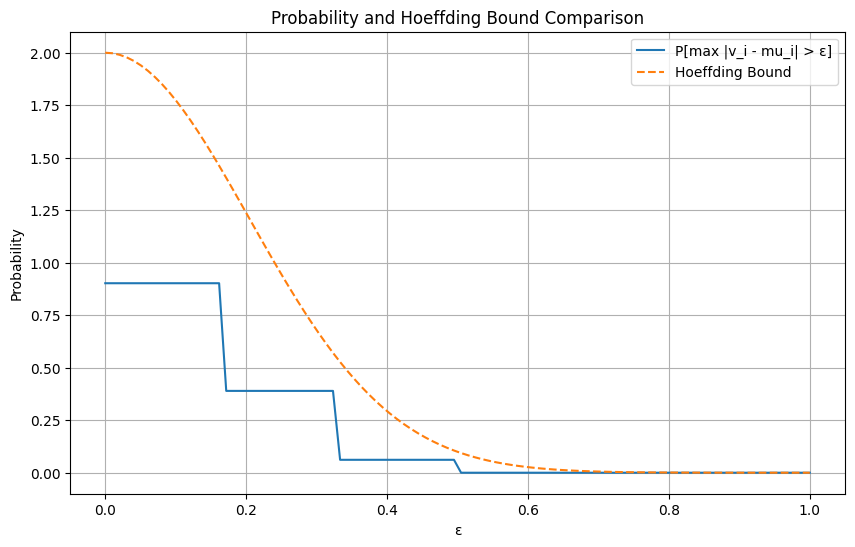

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

# Constants for calculation
N = 6
mu = 0.5
epsilon_values = np.linspace(0, 1, 100)

# Function to calculate the probability for a single coin
def probability_single_coin(N, mu, epsilon):
    prob = 0
    for k in range(N + 1):
        v = k / N
        if abs(v - mu) > epsilon:
            prob += comb(N, k) * mu**k * (1 - mu)**(N - k)
    return prob

# Function to calculate the probability for the max condition
def probability_max(N, mu, epsilon):
    p_single = probability_single_coin(N, mu, epsilon)
    return p_single + p_single - p_single**2

# Hoeffding bound calculation
def hoeffding_bound(N, epsilon):
    return 2 * np.exp(-2 * epsilon**2 * N)

# Calculating probabilities and Hoeffding bound
prob_max_values = [probability_max(N, mu, eps) for eps in epsilon_values]
hoeffding_values = [hoeffding_bound(N, eps) for eps in epsilon_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, prob_max_values, label='P[max |v_i - mu_i| > ε]')
plt.plot(epsilon_values, hoeffding_values, label='Hoeffding Bound', linestyle='--')
plt.xlabel('ε')
plt.ylabel('Probability')
plt.title('Probability and Hoeffding Bound Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 4.9

## Problem:

Reffering to Figure 4.10, why are both curves increasing with $K$? Why do they converge to each other with increasing $K$?

## Solution

### Why are both curves increasing with $k$?:

In Figure 4.10, both the expected out-of-sample error $ E_{out}(g_{m^*}) $ and the expected validation error $ E_{val}(g_{m^*}) $ increase with the validation set size $ K $. This is because as $ K $ increases, the validation set takes away more data from the training set, leaving a smaller training set that might not capture all the complexities of the data. This can lead to models that are less well-trained and thus have higher expected errors when making predictions on new, unseen data.

### Why do they converge to each other with increasing $k$?:

The two curves converge as $ K $ increases because a larger validation set provides a more accurate estimate of the model's performance on unseen data. With a small validation set, the model might appear to perform better because it's easier to fit a small set by chance, which leads to less validation error. However, as $ K $ increases, this temporarily small validation error increases because the validation error becomes a more reliable estimate of the true error, and will eventually lead to the convergence of the validation error to the true out-of-sample error.

# Exercise 4.10

## Problem:

(a) From Figure 4.12, $\mathbb{E}[E_{out}(g^{-}_{m^{*}})]$ is initially decreasing. How can this be, if $\mathbb{E}[E_{out}(g^{-}_{m})]$ is increasing in $K$ for each $m$?

(b) From figure 4.12, we see that $\mathbb{E}[E_{out}(g^{-}_{m^{*}})]$ is initially decreasing, but then starts to increase. What are the possible reasons for this?

(c) When $K=1$ $\mathbb{E}[E_{out}(g^{-}_{m^{*}})]<\mathbb{E}[E_{out}(g_{m^{*}})]$. How can this be, if the learning curves for both models are decreasing?

Figure 4.12: Model selection between $\mathcal{H}_2$ and $\mathcal{H}_5$ using a validation set. The solid black line uses $E_{in}$ for model selection, which always selects $\mathcal{H}_5$. The dotted line shows the optimal model selection, if we could select the model based on the true out-of-sample error. This is unachievable, but a useful benchmark. The best performer is clearly the validation set, outputting $g_{m^{*}}$. For suitable $K$, even $g^{-}_{m^{*}}$ is better than in-sample selection.

## Solution:

### Exercise 4.10 Part (a)

(a) The in-sample error increases with $K$ for each $m$ because as the validation set size increases, the training set size decreases, which can lead to a model that is less well-trained and thus has a higher error. On the other hand, the validation error initially decreases because increasing the size of the validation set allows for a more accurate estimation of the out-of-sample error. This helps in selecting a better model, thus reducing the expected out-of-sample error. However, if the validation set size becomes too large, it takes away too much data from the training set, which eventually leads to poorer model performance due to underfitting.

### Exercise 4.10 Part (b)

(b) The initial decrease in $\mathbb{E}[E_{out}(g^{-}_{m^{*}})]$ is due to the improvement in model training as the validation set size increases, allowing for a more accurate estimate of the model's performance on out of sample data. As the validation set becomes larger, the model selection process becomes more reliable, and the best-performing hypothesis is chosen more consistently. However, the increase in error after a certain point can happen due to overfitting the validation set and insufficient training data because as the validation set size increases, the remaining data for training the model decreases

### Exercise 4.10 Part (c)

(c) When $K=1$, the validation set is very small, and the model $g_{m^{*}}$ is chosen based on its performance on this small set. The expected out-of-sample error for the chosen model $g^{-}_{m^{*}}$ being lower than for $g_{m^{*}}$ can occur if the validation process randomly selects a model that generalizes well despite the small sample size. Learning curves for models show decreasing error as the amount of training data increases, but when very little data is available for validation, the selected model might perform unusually well on the out-of-sample data by luck. As more data becomes available for validation, the hypothesis selection process improves, and the learning curve's behavior becomes more predictable and less influenced by random variations in the small validation set.

# Problem 4.4

## Problem:

This problem is a detailed version of Exercise 4.2. We set up an experimental framework which the reader may use to study various aspects of overfitting. The input space is $\mathcal{X} = [-1 ,1]$, with uniform input probability density, $P(x) =\frac{1}{2}$ We consider the two models $\mathcal{H}_2$ and $\mathcal{H}_{10}$. The target func­
tion is a polynomial of degree $Q_f$, which we write as $f(x) = \sum^{Q_{f}}_{q=0} a_qL_q(x)$, where $L_q(x)$ are the Legendre polynomials. We usethe Legendre polynomials because they are a convenient orthogonal basis for the polynomials on $[—1,1]$ (see Section 4.2 and Problem 4.3 for some basic information on Legendre poly­nomials). The data set is $\mathcal{D}= (x_1, y_1),...,(x_N,y_N)$, where $y_n = f(x_n) + \sigma \epsilon_n$ and $\epsilon_n$ are iid standard Normal random variates.

For a single experiment, with specified values for $Q_f$, $N$, $\sigma$, generate a random degree-$Q_f$ target function by selecting coefficients $a_q$, independently from a standard Normal, rescaling them so that $\mathbb{E}_{\mathbf{a},x} [f^2] = 1$. Generate a data set, selecting $x_1,... ,x_N$ independently from $P(x)$ and $y_n = f(x_n) + \sigma \epsilon_n$. Let $g_2$ and $g_10$ be the best fit hypotheses to the data from $\mathcal{H}_2$ and $\mathcal{H}_{10}$ respectively, with respective out-of-sample errors $E_{out}(g_2)$ and $E_{out}(g_10)$.

(a) Why do we normalize $f$? [Hint: how would you interpret $\sigma$?]

(b) How can we obtain $g_2$, $g_{10}$? [Hint: pose the problem as linear regression and use the technology from Chapter 3.]

(c) How can we compute $E_{out}$ analytically for a given $g_{10}$?

(d) Vary $Q_f$, $N$, $\sigma$ and for each combination of parameters, run a large num­ber of experiments, each time computing $E_{out}(\mathcal{H}_2)$ and $E_{out}(\mathcal{H}_{10})$ Aver­aging these out-of-sample errors gives estimates of the expected out-of- sample error for the given learning scenario ($Q_f$, $N$, $\sigma$) using $\mathcal{H}_2$ and $\mathcal{H}_{10}$. Let

$E_{out}(\mathcal{H}_{2})$ = average over experiments $(E_{out}(g_{2}))$

$E_{out}(\mathcal{H}_{10})$ = average over experiments $(E_{out}(g_{10}))$

Define the overfit measure $E_{out}(\mathcal{H}_{10})-E_{out}(\mathcal{H}_{1})$. When is the over­ fit measure significantly positive (i.e., overfitting is serious) as opposed to significantly negative? Try the choices $Q_f \in \{1, 2 , . . . , 100\}$, $N \in \{20, 25,..., 120\}$, $\sigma^2 \in \{0, 0.05, 0.1,..., 2\}$.

Explain your observations.

(e) Why do we take the average over many experiments? Use the variance to select an acceptable number of experiments to average over.

(f) Repeat this experiment for classification, where the target function is a noisy perceptron, $f = sign(\sum^{Q_f}_{q=1}a_qL_q(x) + \epsilon)$. Notice that $a_0 = 0$, and the $a_q$'s should be normalized so that $\mathbb{E}_{\mathbf{a},x}[(\sum^{Q_f}_{q=1}a_qL_q(x))^2] = 1$. For classification, the models $\mathcal{H}_2$, $\mathcal{H}_{10}$ contain the 2nd and 10th order polynomials respectively. You may use a learning algorithm for non-separable data from Chapter 3.

## Solution:

### Problem 4.4 Part (a)

(a) We normalize $ f $ by ensuring that $\mathbb{E}_{\mathbf{a},x} [f^2] = 1$ because it standardizes the variance of the target function across the different experiments. By making the scale of $f$ consistent it allows for a meaningful interpretation of $\sigma$, the noise level in the data. $\sigma$ then directly represents the ratio of noise variance to the variance of $ f $, making it easier to compare the effect of noise across different experiments and different target functions. Without this normalization, the interpretation of $\sigma$ would be less clear, as the inherent variance of $f$ could differ from one experiment to another, mixing up the effects of noise and variance of the target function.

### Problem 4.4 Part (b)

(b) To obtain $g_2$ and $g_{10}$, we can pose the problem as a linear regression where the Legendre polynomials $L_q(x)$ form the basis.

For $\mathcal{H}_2$, we would use the first three Legendre polynomials (up to the quadratic term) and for $\mathcal{H}_{10}$, we would use the first eleven.

We would then perform linear regression to obtain $g_2$ and $g_{10}$. A matrix $X$ would be created with rows corresponding to the values of the Legendre polynomials evaluated at each $x_n$, and then solve for the weight vector $\mathbf{w}$ that minimizes the squared error. The resulting weight vector $\mathbf{w}$ would represents the coefficients of the best fit hypothesis.

### Problem 4.4 Part (c)

(c) To compute $E_{out}$ analytically for a given $g_{10}$, we would need to integrate the squared difference between $g_{10}(x)$ and the true target function $f(x)$ over the input space $\mathcal{X}$, weighted by the input probability density $P(x)$. Since the Legendre polynomials form an orthogonal basis over the interval $[-1, 1]$ with respect to the uniform distribution, the out-of-sample error can be represented as:

$$E_{out}(g_{10}) = \int_{-1}^{1} \frac{1}{2} (g_{10}(x) - f(x))^2 \, dx$$

However, we do not know $f(x)$ and therfore we can't compute $E_{out}$ exactly and must estimate it using new data that was not used to fit $g_{10}$.

### Problem 4.4 Part (d)

In [66]:
import numpy as np
from tqdm import tqdm

def generate_target_function(Q_f):
    # Generate coefficients from a standard normal distribution
    a_q = np.random.randn(Q_f + 1)
    # Normalize coefficients to make E[f^2] = 1
    a_q /= np.sqrt(np.sum(a_q ** 2))
    return a_q

def generate_data_set(N, Q_f, sigma):
    # Uniformly sample x values and generate corresponding y values with noise
    x_n = np.random.uniform(-1, 1, N)
    y_n = np.sum([a * np.polynomial.legendre.Legendre.basis(deg)(x_n) 
                  for deg, a in enumerate(generate_target_function(Q_f))], axis=0)
    y_n += sigma * np.random.randn(N)
    return x_n, y_n

def fit_polynomial(x_n, y_n, degree):
    # Fit a polynomial of a given degree to the data
    coeffs = np.polynomial.polynomial.polyfit(x_n, y_n, degree)
    return coeffs

def compute_E_out(coeffs, Q_f, sigma):
    # Compute the out-of-sample error of the polynomial
    x_test = np.random.uniform(-1, 1, 1000)
    y_true = np.sum([a * np.polynomial.legendre.Legendre.basis(deg)(x_test) 
                     for deg, a in enumerate(generate_target_function(Q_f))], axis=0)
    y_pred = np.polynomial.polynomial.polyval(x_test, coeffs)
    E_out = np.mean((y_true - y_pred)**2)
    return E_out

def run_experiments(Q_f_range, N_range, sigma_squared_range, num_experiments):
    overfit_measures = []
    total_iterations = len(Q_f_range) * len(N_range) * len(sigma_squared_range) * num_experiments
    
    with tqdm(total=total_iterations, desc='Running Experiments', unit=' experiments') as pbar:
        # Loop over all combinations of Q_f, N, and sigma
        for Q_f in Q_f_range:
            for N in N_range:
                for sigma_squared in sigma_squared_range:
                    sigma = np.sqrt(sigma_squared)
                    E_out_H2_sum = 0
                    E_out_H10_sum = 0
                    
                    # Perform experiments
                    for _ in range(num_experiments):
                        x_n, y_n = generate_data_set(N, Q_f, sigma)
                        coeffs_H2 = fit_polynomial(x_n, y_n, 2)
                        coeffs_H10 = fit_polynomial(x_n, y_n, 10)
                        E_out_H2_sum += compute_E_out(coeffs_H2, Q_f, sigma)
                        E_out_H10_sum += compute_E_out(coeffs_H10, Q_f, sigma)
                        pbar.update(1)
                    
                    # Average the out-of-sample errors
                    E_out_H2_avg = E_out_H2_sum / num_experiments
                    E_out_H10_avg = E_out_H10_sum / num_experiments
                    overfit_measure = E_out_H10_avg - E_out_H2_avg
                    overfit_measures.append((Q_f, N, sigma_squared, overfit_measure))    
    return overfit_measures

# Define ranges for Q_f, N, and sigma^2
Q_f_range = range(1, 101)
N_range = range(20, 121, 5)
sigma_squared_range = np.arange(0, 2.05, 0.05)
num_experiments = 10

overfit_measures = run_experiments(Q_f_range, N_range, sigma_squared_range, num_experiments)

Running Experiments: 100%|██████████| 861000/861000 [6:28:41<00:00, 36.92 experiments/s]  


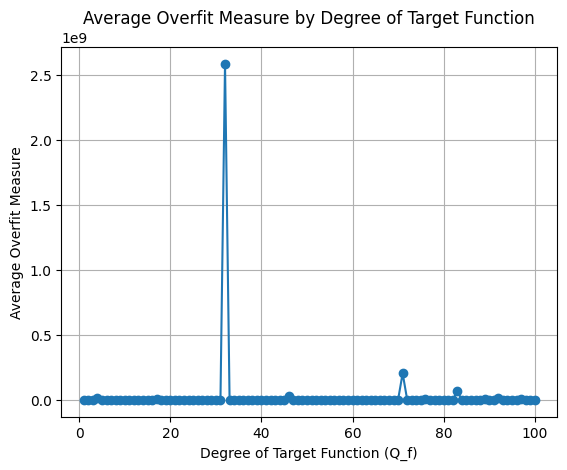

In [67]:
def analyze_results_Q_f(overfit_measures):
    # Convert list of tuples to a structured NumPy array
    dtype = [('Q_f', int), ('N', int), ('sigma_squared', float), ('overfit_measure', float)]
    results_array = np.array(overfit_measures, dtype=dtype)

    # Calculate average overfit measure for each Q_f
    avg_overfit_by_Q_f = np.array([
        (Q_f, np.mean(results_array[results_array['Q_f'] == Q_f]['overfit_measure']))
        for Q_f in np.unique(results_array['Q_f'])
    ])

    # Plot the average overfit measure by Q_f
    plt.plot(avg_overfit_by_Q_f[:, 0], avg_overfit_by_Q_f[:, 1], marker='o')
    plt.xlabel('Degree of Target Function (Q_f)')
    plt.ylabel('Average Overfit Measure')
    plt.title('Average Overfit Measure by Degree of Target Function')
    plt.grid(True)
    plt.show()


analyze_results_Q_f(overfit_measures)

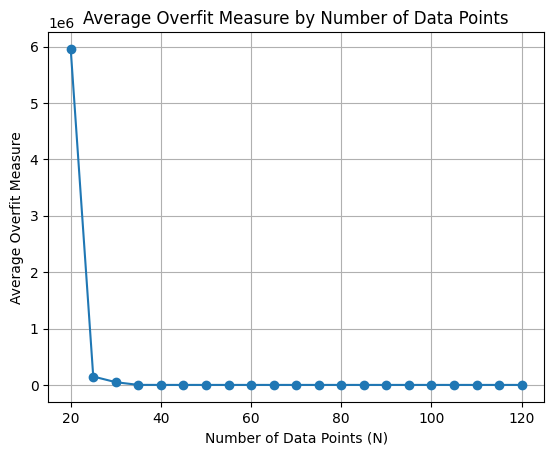

In [52]:
def analyze_results_N(overfit_measures):
    # Convert list of tuples to a structured NumPy array
    dtype = [('Q_f', int), ('N', int), ('sigma_squared', float), ('overfit_measure', float)]
    results_array = np.array(overfit_measures, dtype=dtype)

    # Calculate average overfit measure for each N
    avg_overfit_by_N = np.array([
        (N, np.mean(results_array[results_array['N'] == N]['overfit_measure']))
        for N in np.unique(results_array['N'])
    ])

    # Plot the average overfit measure by N
    plt.plot(avg_overfit_by_N[:, 0], avg_overfit_by_N[:, 1], marker='o')
    plt.xlabel('Number of Data Points (N)')
    plt.ylabel('Average Overfit Measure')
    plt.title('Average Overfit Measure by Number of Data Points')
    plt.grid(True)
    plt.show()

analyze_results_N(overfit_measures)

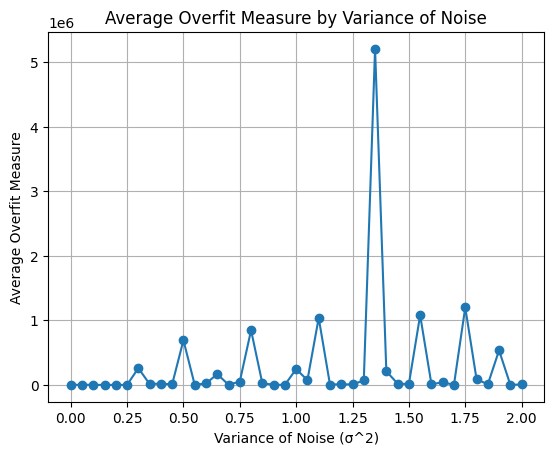

In [53]:
def analyze_results_sigma_squared(overfit_measures):
    # Convert list of tuples to a structured NumPy array
    dtype = [('Q_f', int), ('N', int), ('sigma_squared', float), ('overfit_measure', float)]
    results_array = np.array(overfit_measures, dtype=dtype)

    # Calculate average overfit measure for each sigma^2
    avg_overfit_by_sigma_squared = np.array([
        (sigma_squared, np.mean(results_array[results_array['sigma_squared'] == sigma_squared]['overfit_measure']))
        for sigma_squared in np.unique(results_array['sigma_squared'])
    ])

    # Plot the average overfit measure by sigma^2
    plt.plot(avg_overfit_by_sigma_squared[:, 0], avg_overfit_by_sigma_squared[:, 1], marker='o')
    plt.xlabel('Variance of Noise (σ^2)')
    plt.ylabel('Average Overfit Measure')
    plt.title('Average Overfit Measure by Variance of Noise')
    plt.grid(True)
    plt.show()

analyze_results_sigma_squared(overfit_measures)

The provided plots indicate a clear trend of overfitting behavior with respect to the complexity of the target function, sample size, and noise variance. Overfitting is particularly pronounced when the model complexity $\mathcal{H}_{10}$ is too high for the underlying function, which is evident from the spikes in the overfit measure for certain degrees of $Q_f$.

A sharp decline in overfitting is observed as the number of data points $N$ increases, highlighting the importance of sample size in model generalization.

Additionally, the overfit measure fluctuates with the variance of noise $\sigma^2$, with notable peaks suggesting that there are points in the noise levels beyond which the model's ability to generalize deteriorates significantly.

### Problem 4.4 Part (e)

We take the average over many experiments to reduce the effect of random variations in the data. By averaging over many experiments, we can reduce the effect of random variations in the data and obtain a more reliable estimate of the expected out-of-sample error. The variance of the error estimate can be used to determine the number of experiments to average over. The variance of the error estimate is inversely proportional to the number of experiments, so the more experiments we average over, the lower the variance of the error estimate.

### Problem 4.4 Part (f)

In [64]:
import numpy as np
from tqdm.notebook import tqdm

def generate_target_function(Q_f):
    # Generate coefficients from a standard normal distribution
    a_q = np.random.randn(Q_f + 1)
    a_q[0] = 0  # Ensure that a_0 = 0
    # Normalize coefficients to make E[sum(a_q*L_q(x))^2] = 1
    normalization_factor = np.sqrt(2 / (2 * np.arange(1, Q_f + 1) + 1))
    a_q[1:] *= normalization_factor
    return a_q

def generate_classification_data(N, Q_f, sigma, a_q):
    # Uniformly sample x values and generate corresponding y values with noise
    x_n = np.random.uniform(-1, 1, N)
    L_q_x = np.polynomial.legendre.legval(x_n, a_q)
    epsilon_n = np.random.randn(N)
    # Compute the target function as sign of the polynomial plus noise
    f_n = np.sign(L_q_x + epsilon_n)
    return x_n, f_n

def fit_polynomial_classification(x_n, y_n, degree):
    # Generate polynomial features up to a certain degree
    X = np.polynomial.legendre.legvander(x_n, degree)
    # Initialize weights
    w = np.random.randn(degree + 1)
    # Simple Perceptron Algorithm for demonstration (not gradient descent)
    for _ in range(100):  # 100 iterations of Perceptron updates
        for i in range(len(y_n)):
            if y_n[i] * (X[i] @ w) <= 0:
                w += y_n[i] * X[i]
    return w

def compute_E_out_classification(x_n, y_n, w, degree):
    X = np.polynomial.legendre.legvander(x_n, degree)
    predictions = np.sign(X @ w)
    E_out = np.mean(predictions != y_n)
    return E_out

def run_experiments_classification(Q_f_range, N_range, sigma_squared_range, num_experiments):
    total_experiments = len(Q_f_range) * len(N_range) * len(sigma_squared_range) * num_experiments
    results = []
    
    with tqdm(total=total_experiments, desc='Progress', unit=' experiments') as pbar:
        for Q_f in Q_f_range:
            for N in N_range:
                for sigma_squared in sigma_squared_range:
                    a_q = generate_target_function(Q_f)
                    E_out_H2_list = []
                    E_out_H10_list = []
                    for _ in range(num_experiments):
                        sigma = np.sqrt(sigma_squared)
                        x_n, y_n = generate_classification_data(N, Q_f, sigma, a_q)
                        w_H2 = fit_polynomial_classification(x_n, y_n, 2)
                        w_H10 = fit_polynomial_classification(x_n, y_n, 10)
                        E_out_H2 = compute_E_out_classification(x_n, y_n, w_H2, 2)
                        E_out_H10 = compute_E_out_classification(x_n, y_n, w_H10, 10)
                        E_out_H2_list.append(E_out_H2)
                        E_out_H10_list.append(E_out_H10)
                        pbar.update(1)
                    
                    avg_E_out_H2 = np.mean(E_out_H2_list)
                    avg_E_out_H10 = np.mean(E_out_H10_list)
                    overfit_measure = avg_E_out_H10 - avg_E_out_H2
                    results.append((Q_f, N, sigma_squared, avg_E_out_H2, avg_E_out_H10, overfit_measure))
    return results

# Parameters for the experiment
Q_f_range = np.arange(1, 101)
N_range = np.arange(20, 121, 5)
sigma_squared_range = np.arange(0, 2.05, 0.05)
num_experiments = 10

# Run the classification experiments
classification_results = run_experiments_classification(Q_f_range, N_range, sigma_squared_range, num_experiments)


Progress:   0%|          | 0/861000 [00:00<?, ? experiments/s]

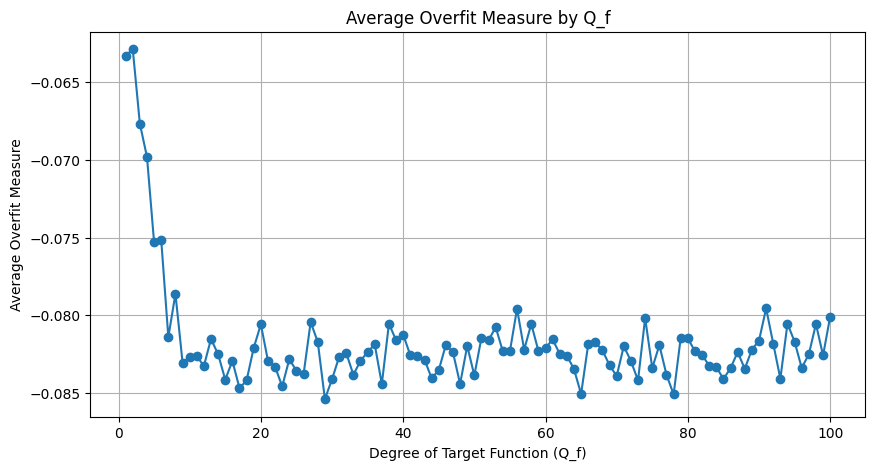

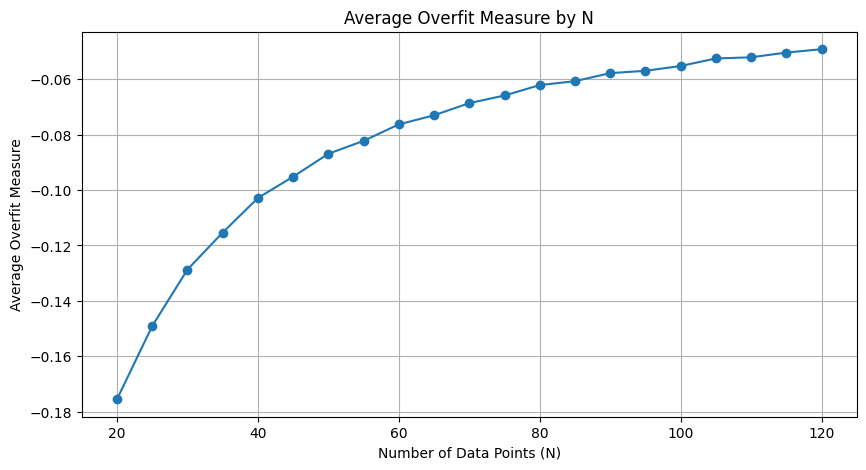

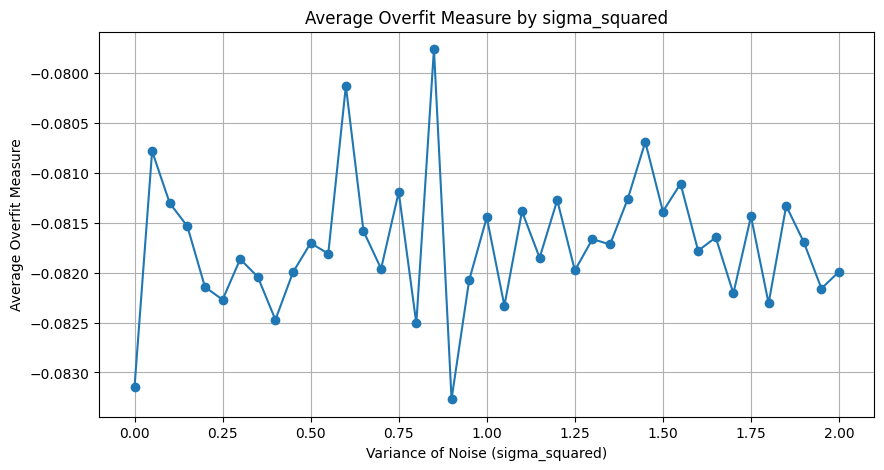

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the results to a structured NumPy array for easier slicing
dtype = [('Q_f', int), ('N', int), ('sigma_squared', float), ('avg_E_out_H2', float), ('avg_E_out_H10', float), ('overfit_measure', float)]
results_array = np.array(classification_results, dtype=dtype)

# Group by Q_f, N, and sigma_squared to plot
Q_f_values = np.unique(results_array['Q_f'])
N_values = np.unique(results_array['N'])
sigma_squared_values = np.unique(results_array['sigma_squared'])

# Function to plot the results
def plot_results(x_values, y_values, x_label, title):
    plt.figure(figsize=(10, 5))
    plt.plot(x_values, y_values, marker='o')
    plt.xlabel(x_label)
    plt.ylabel('Average Overfit Measure')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Plot by Q_f
avg_overfit_by_Q_f = [np.mean(results_array[results_array['Q_f'] == Q_f]['overfit_measure']) for Q_f in Q_f_values]
plot_results(Q_f_values, avg_overfit_by_Q_f, 'Degree of Target Function (Q_f)', 'Average Overfit Measure by Q_f')

# Plot by N
avg_overfit_by_N = [np.mean(results_array[results_array['N'] == N]['overfit_measure']) for N in N_values]
plot_results(N_values, avg_overfit_by_N, 'Number of Data Points (N)', 'Average Overfit Measure by N')

# Plot by sigma_squared
avg_overfit_by_sigma_squared = [np.mean(results_array[results_array['sigma_squared'] == sigma]['overfit_measure']) for sigma in sigma_squared_values]
plot_results(sigma_squared_values, avg_overfit_by_sigma_squared, 'Variance of Noise (sigma_squared)', 'Average Overfit Measure by sigma_squared')
